## 케라스 모델을 만드는 방법

In [1]:
# Sequential 클래스
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
])

In [2]:
# 점진적으로 Sequenential 모델 만들기
model = keras.Sequential()
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

# 가중치를 만들기위해 모델을 호출

In [3]:
import numpy as np
model.build(input_shape=(None,3))

In [4]:
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[-0.16003019,  0.5344566 ,  0.460621  , -0.36025003,  0.039177  ,
         -0.4912628 , -0.29809383,  0.23702282, -0.0787316 , -0.28290474],
        [-0.64474326,  0.10509002, -0.21858329,  0.5561538 ,  0.12178111,
          0.3954916 , -0.4868639 ,  0.37747753, -0.00336224,  0.4739653 ],
        [ 0.4572475 ,  0.02214909,  0.0750041 , -0.18858415, -0.5018818 ,
         -0.49757004,  0.03912485, -0.35134974,  0.4703579 , -0.2239263 ]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 10) dtype=float32, numpy=
 array([[-0.37817788, -0.16607562, -0.32117748, -0.42449355,  0.41283238,
         -0.18453452,  0.18620723, -0.08902171, -0.30454588, -0.5127676 ],
        [-0.25651056, -0.5232064 , -0.20324597,  0.24858141, -0.51250374,
         -0.05514398, -0.29820654, -0

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                40        
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = keras.Sequential(name='myModel')
model.add(layers.Dense(64,activation='relu', name='first_layer'))
model.add(layers.Dense(10,activation='relu', name='last_layer'))
model.build((None,3))
model.summary()

Model: "myModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                256       
                                                                 
 last_layer (Dense)          (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델의 입력 크기를 미리 지정
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64,activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 함수형 API
# 두개의 Dense층을 가지는 간단한 함수형 모델

In [9]:
inputs = keras.Input(shape=(3,), name='my_input')
features = layers.Dense(64,activation='relu')(inputs)
outputs = layers.Dense(10,activation='softmax')(features)

In [10]:
model = keras.Model(inputs=inputs, outputs=features)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                256       
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 다중입력, 다중 출력 함수형 모델

In [12]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [13]:
title = keras.Input(shape=(vocabulary_size,),name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

In [14]:
features =  layers.Concatenate()([title,text_body,tags])
features =  layers.Dense(64,activation='relu')(features)
priority = layers.Dense(1,activation='sigmoid',name='priority')(features)
department =  layers.Dense(num_departments,activation='softmax',name='department')(features)
model = keras.Model(inputs=[title,text_body,tags], outputs = [priority,department])

In [15]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

# 입력과 타깃 배열 리스트를 전달해서 모델 훈련

In [16]:
import numpy as np
num_samples = 1280
title_data = np.random.randint(0,2, size=(num_samples, vocabulary_size))
text_body = np.random.randint(0,2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0,2,size=(num_samples,num_tags))

In [17]:
priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0,2,size=(num_samples, num_departments))

In [18]:
model.compile(optimizer='adam',loss = ['mse','categorical_crossentropy'],metrics=['mae','acc'])

In [19]:
history = model.fit([title_data,text_body, tags_data],[priority_data,department_data],epochs=1)

40/40 [==============================] - 1s 14ms/step - loss: 8.5667 - priority_loss: 0.1977 - department_loss: 8.3690 - priority_mae: 0.3662 - priority_acc: 0.0000e+00 - department_mae: 0.5015 - department_acc: 0.2320


In [20]:
model.evaluate([title_data,text_body, tags_data],[priority_data,department_data])

40/40 [==============================] - 0s 6ms/step - loss: 7.0157 - priority_loss: 0.2535 - department_loss: 6.7622 - priority_mae: 0.4235 - priority_acc: 0.0000e+00 - department_mae: 0.4685 - department_acc: 0.3633


[7.0157060623168945,
 0.2534959614276886,
 6.762210845947266,
 0.42353278398513794,
 0.0,
 0.46850505471229553,
 0.36328125]

In [21]:
priority_preds, department_preds = model.predict([title_data, text_body, tags_data])

40/40 [==============================] - 0s 6ms/step


In [22]:
priority_preds, department_preds

(array([[0.03331835],
        [0.10668685],
        [0.03830338],
        ...,
        [0.03032428],
        [0.03179675],
        [0.16824414]], dtype=float32),
 array([[6.8536502e-01, 1.8505234e-05, 2.6725760e-02, 2.8789073e-01],
        [4.8905382e-01, 4.2329808e-05, 1.1150606e-01, 3.9939779e-01],
        [3.3964890e-01, 1.9592414e-06, 1.6437940e-02, 6.4391118e-01],
        ...,
        [6.0716331e-02, 6.0576072e-04, 6.6221468e-02, 8.7245649e-01],
        [2.2554022e-01, 8.7590910e-05, 5.9616487e-02, 7.1475577e-01],
        [1.4627641e-01, 2.7046299e-05, 9.7577982e-02, 7.5611860e-01]],
       dtype=float32))

# 입력 타깃과 배열을 딕셔너리로 전달해서 모델을 훈련

In [23]:
model.compile(optimizer='adam',
              loss = {"priority" : 'mse', "department":'categorical_crossentropy'},
              metrics={"priority":['mae'],"department":['acc']}
             )

history = model.fit(
    {"title":title_data,
     "text_body":text_body, 
     "tags":tags_data},
    {
        "priority":priority_data,
        "department":department_data}
    ,epochs=1)

model.evaluate(
    {"title":title_data,
     "text_body":text_body, 
     "tags":tags_data},
    {
        "priority":priority_data,
        "department":department_data}
)
priority_preds, department_preds = model.predict(
    {
        "title":title_data, 
        "text_body":text_body, 
        "tags":tags_data
    }
)

40/40 [==============================] - 0s 6ms/step


# 함수형 API의 장점 : 층 연결구조 활용

In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

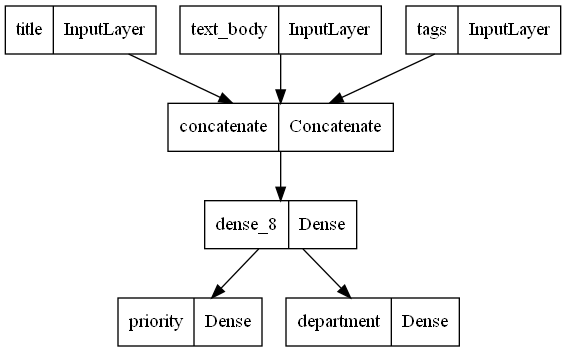

In [25]:
keras.utils.plot_model(model,'tiket_classifier.png')

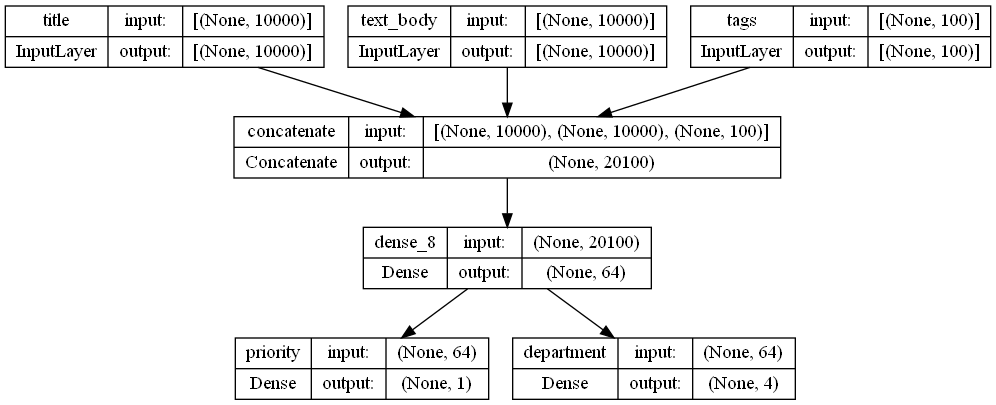

In [26]:
keras.utils.plot_model(model,'tiket_classifier_with_shape_info.png',show_shapes=True)

# 함수형 모델에 있는 층의 입력과 출력을 출력

In [27]:
model.layers

In [28]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [29]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

# 중간층의 출력을 재사용해서 새로운 모델 

In [31]:
# feature = model.layers[4].output
# difficulty =  layers.Dense(3,activation='softmax',name='difficulty')(feature)
# new_model = keras.Model(inputs =[title,text_body,tags] ,  outputs = [priority,department])
# model = keras.Model(inputs=[title,text_body,tags], outputs = [priority,department,difficulty])

# Model 서브클래싱

In [56]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs=outputs)
class MyModel(keras.Model):
    def __init__(self,num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64,activation='relu')
        self.classifier = binary_classifier
        print("__init__")
    def call(self, inputs):
        features = self.dense(inputs)
        print("call.....")
        return self.classifier(features)        

In [60]:
# 표준 플로우 워크 : compile(), fit(), evaluate(), predict()

In [61]:
from tensorflow.keras.datasets import mnist

In [77]:
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512,activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10,activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

In [78]:
(images,labes),(test_images, test_labels) = mnist.load_data()

In [79]:
images.shape

(60000, 28, 28)

In [80]:
# 전처리  28*28 - > 28 x 28
# 데이터 표준화
split = 10000
images = images.reshape(-1,28*28).astype('float32') / 255
test_images = test_images.reshape(-1,28*28).astype('float32') / 255
# 데이터를 분할... 테스트 데이터 10000
train_images,val_images = images[:-split],images[-split:]
train_labels,val_labels = labes[:-split],labes[-split:]

In [81]:
train_images.shape, val_images.shape, train_labels.shape, val_labels.shape

((50000, 784), (10000, 784), (50000,), (10000,))

In [82]:
model = get_mnist_model()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(train_images,train_labels,epochs=3,validation_data=(val_images,val_labels))

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2934 - acc: 0.9123 - val_loss: 0.1335 - val_acc: 0.9626
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1484 - acc: 0.9552 - val_loss: 0.0919 - val_acc: 0.9736
Epoch 3/3
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1154 - acc: 0.9649 - val_loss: 0.0867 - val_acc: 0.9739


In [83]:
test_metrics =  model.evaluate(test_images,test_labels)
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


#### 사용자 정의 지표 구현

In [86]:
import tensorflow as tf
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(
            name='total_samples', initializer='zeros', dtype='int32'
        )
    def update_state(self, y_true, y_pred, sample_weight = None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true-y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    def reset_state(self):
        self.mse_sum.assign(0)
        self.total_samples.assign(0)

In [89]:
model = get_mnist_model()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc',RootMeanSquaredError()])
model.fit(train_images,train_labels,epochs=3,validation_data=(val_images,val_labels))
test_metrics = model.evaluate(test_images,test_labels)

Epoch 1/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2911 - acc: 0.9122 - rmse: 7.1274 - val_loss: 0.1300 - val_acc: 0.9630 - val_rmse: 7.3309
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1458 - acc: 0.9553 - rmse: 7.3068 - val_loss: 0.1001 - val_acc: 0.9709 - val_rmse: 7.3823
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0839 - acc: 0.9739 - rmse: 7.4151


In [90]:
# callback method
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",patience=2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',
        monitor="val_loss",
        save_best_only=True
    )
]